# Importing the Required Packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [6]:
data= pd.read_csv("Documents/DS Projects/IMDb Movies India.csv",na_values=(' '),encoding='latin-1')


In [7]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15508 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# Data Preprocessing 

In [10]:
data.isnull().sum()
#data comprises of null values

Name           1
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
missing_count = data.isnull().sum().sort_values(ascending=False)
missing_percent = (round(data.isnull().sum()/data.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent], 
                       axis=1, 
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Duration,8269,53.32
Rating,7590,48.94
Votes,7589,48.93
Actor 3,3144,20.27
Actor 2,2384,15.37
Genre,1877,12.10
Actor 1,1617,10.43
Year,528,3.40
Director,525,3.39
Name,1,0.01


### The missing percentage of the Rating column is 48.94%. We will predict the rating, so first remove the null values of this variable. 

In [13]:
data.dropna(subset = ['Rating'], inplace = True)
missing_percent = (round(data.isnull().sum()/data.isnull().count(), 4)*100).sort_values(ascending=False)
missing_percent

Duration    26.11
Actor 3      3.69
Actor 2      2.53
Actor 1      1.58
Genre        1.29
Director     0.06
Name         0.00
Year         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [14]:
#Let's drop the missing values from the other features except for Duration 
data.dropna(subset = ['Actor 3', 'Actor 2', 'Actor 1', 'Genre', 'Director'], inplace = True)

In [15]:
missing_percent = (round(data.isnull().sum()/data.isnull().count(), 4)*100).sort_values(ascending=False)
missing_percent

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

### Movie name doesnt have much significance here. So lets drop that column. Also, Movie Duration has many missing columns, so lets discard this feature as well.

In [17]:
data.drop(columns=['Name','Duration'],axis=1,inplace=True)
data.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [18]:
# Let's deal with duplicate values
data.drop_duplicates(inplace=True)
data.duplicated().sum()


0

In [19]:
missing_percent = (round(data.isnull().sum()/data.isnull().count(), 4)*100).sort_values(ascending=False)
missing_percent

Year        0.0
Genre       0.0
Rating      0.0
Votes       0.0
Director    0.0
Actor 1     0.0
Actor 2     0.0
Actor 3     0.0
dtype: float64

In [20]:
#Convert the format of the year and votes into int

# Lets convert Votes column from string to int and replace all the unwanted symbols
data['Votes'] = data['Votes'].str.replace(',','')
data['Votes'] = data['Votes'].str.replace('.','')
data['Votes'] = data['Votes'].str.strip('$')
data['Votes'] = data['Votes'].str.strip('M')
data['Votes'] = data['Votes'].astype(int)
#Don't re run it because it is already converted into int and can produce errors.


In [21]:
# Lets convert Date column from string to int
data['Year']= data['Year'].str.strip('()').astype(int)


In [22]:
data.nunique()

Year          92
Genre        416
Rating        84
Votes       2030
Director    2956
Actor 1     2415
Actor 2     2783
Actor 3     3031
dtype: int64

# Data Visualization 

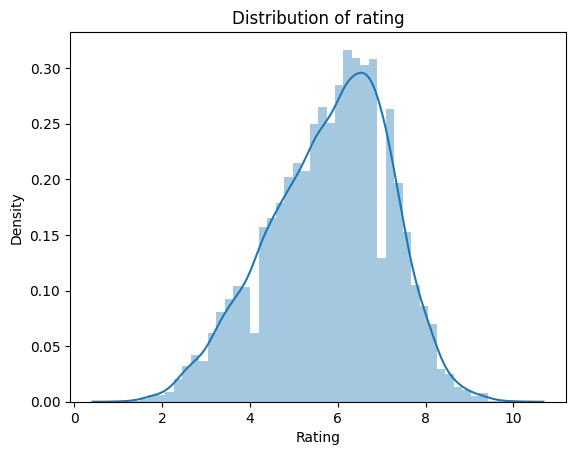

In [42]:
sns.distplot(data['Rating'])
plt.title('Distribution of rating')
plt.show()

Let's plot the features like Genre, Director and Actors

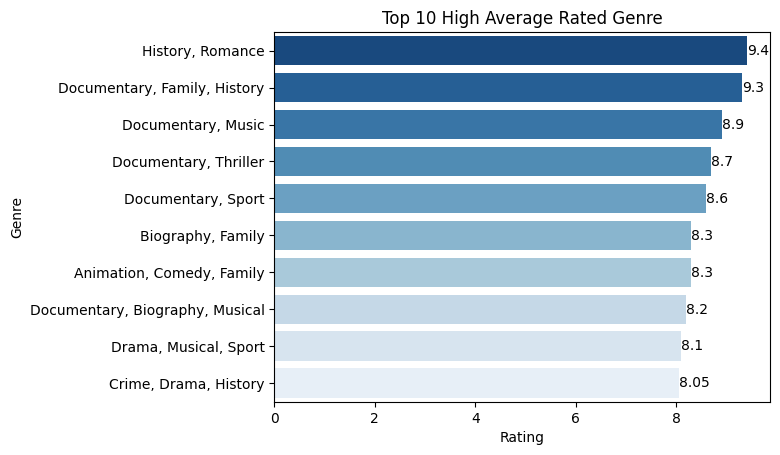

In [40]:
# plotting top ten high average rated genres 
genre_rate = data.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

gr = sns.barplot(data=genre_rate, x='Rating', y='Genre', palette='Blues_r')
gr.bar_label(gr.containers[0])
plt.title('Top 10 High Average Rated Genre')
plt.show()

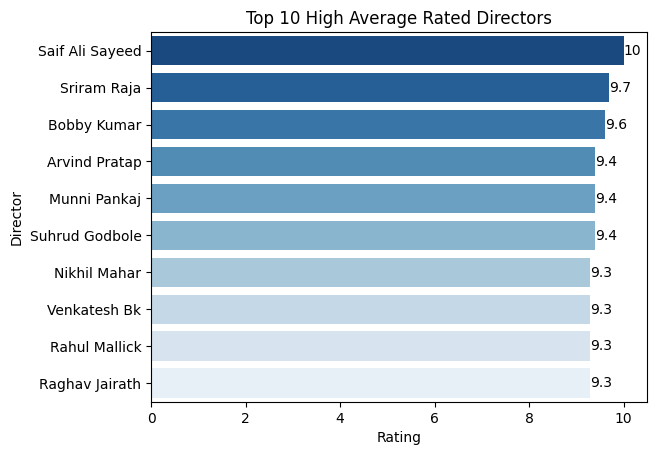

In [41]:
# plotting top ten high average rated directors
director_rate = data.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

dr = sns.barplot(data=director_rate, x='Rating', y='Director', palette='Blues_r')
dr.bar_label(dr.containers[0])
plt.title('Top 10 High Average Rated Directors')
plt.show()

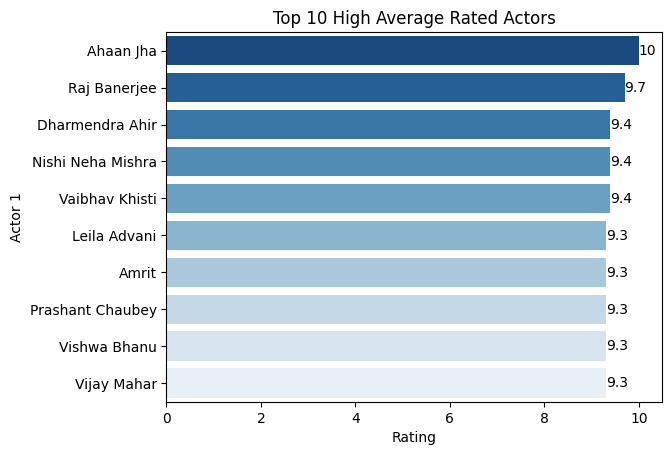

In [43]:
# plotting top ten high average rated actors
actor1_rate = data.groupby('Actor 1').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

ar = sns.barplot(data=actor1_rate, x='Rating', y='Actor 1', palette='Blues_r')
ar.bar_label(ar.containers[0])
plt.title('Top 10 High Average Rated Actors')
plt.show()

# Feature Engineering

In [45]:
#Encoding categorical variables like Director, Genre and actors using Mean Encoding
data['Genre encoded'] = round(data.groupby('Genre')['Rating'].transform('mean'),1)
data['Director encoded'] = round(data.groupby('Director')['Rating'].transform('mean'),1)
data['Actor 1 encoded'] = round(data.groupby('Actor 1')['Rating'].transform('mean'),1)
data['Actor 2 encoded'] = round(data.groupby('Actor 2')['Rating'].transform('mean'),1)
data['Actor 3 encoded'] = round(data.groupby('Actor 3')['Rating'].transform('mean'),1)

data.drop(columns=['Genre','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
data['Rating'] = round(data['Rating'],1)
data.head()

,Year,Rating,Votes,Genre encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
1,2019,7.0,8,6.3,7.0,6.8,7.0,7.0
3,2019,4.4,35,5.7,4.4,5.4,4.4,4.4
5,1997,4.7,827,6.2,5.4,4.8,5.8,5.8
6,2005,7.4,1086,6.8,7.5,5.3,6.0,6.5
8,2012,5.6,326,5.5,5.6,5.6,5.9,5.6


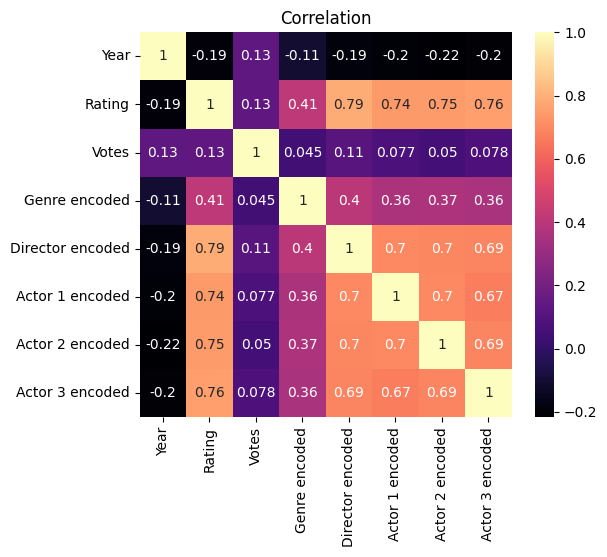

In [46]:
plt.figure(figsize = (6,5))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='magma', annot=True)
plt.title('Correlation')
plt.show()


In [48]:
#Target Variable
X= data.drop('Rating',axis = 1)
Y = data['Rating']
X.head()

,Year,Votes,Genre encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
1,2019,8,6.3,7.0,6.8,7.0,7.0
3,2019,35,5.7,4.4,5.4,4.4,4.4
5,1997,827,6.2,5.4,4.8,5.8,5.8
6,2005,1086,6.8,7.5,5.3,6.0,6.5
8,2012,326,5.5,5.6,5.6,5.9,5.6


In [49]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test =  train_test_split(X,Y, train_size = 0.8, random_state = 42)

In [50]:
print('Shape of training features: ', X_train.shape)
print('Shape of training target: ', Y_train.shape)
print('Shape of testing features: ', X_test.shape)
print('Shape of testing target: ', Y_test.shape)

Shape of training features:  (6046, 7)
Shape of training target:  (6046,)
Shape of testing features:  (1512, 7)
Shape of testing target:  (1512,)


# Model Training and Evaluation

## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
LR_Model = LinearRegression()
LR_Model.fit(X_train, Y_train)



LinearRegression()

In [56]:
Y_pred_LR = LR_Model.predict(X_test)


In [49]:
errors = abs(Y_pred_LR - Y_test)
#Calculate Mean Absolute percentage error
MAPE_LR = 100*(errors/Y_test)
accuracy_LR = 100 - np.mean(MAPE_LR)
print("Accuracy of the model is", round(accuracy_LR,2), '%')

Accuracy of the model is 90.19 %


In [60]:
results = pd.DataFrame({'actual': Y_test,
                       'predicted': Y_pred_LR.ravel(),
                       'residual': Y_test - Y_pred_LR})

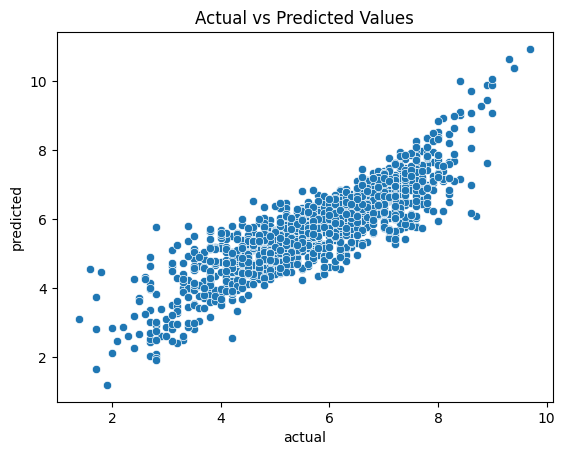

In [61]:
#Visualizing 'predicted' over 'actual' values
sns.scatterplot(x=results['actual'], y=results['predicted'])
plt.title('Actual vs Predicted Values')
plt.show()

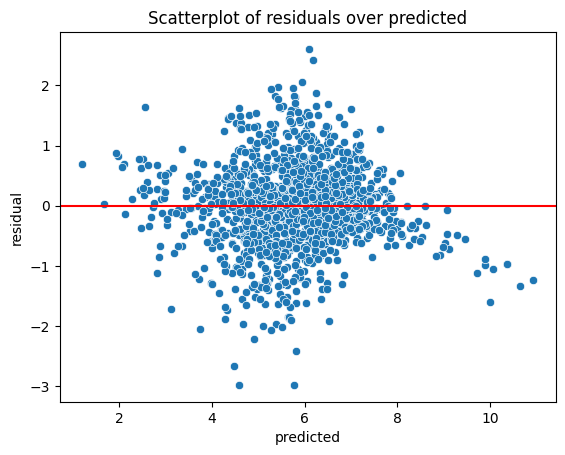

In [62]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x=results['predicted'], y=results['residual'])
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

## Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
DTR_Model = DecisionTreeRegressor()
DTR_Model.fit(X_train, Y_train)


DecisionTreeRegressor()

In [69]:
Y_pred_DTR = DTR_Model.predict(X_test)

In [50]:
errors = abs(Y_pred_DTR - Y_test)
#Calculate Mean Absolute percentage error
MAPE_DTR = 100*(errors/Y_test)
accuracy_DTR = 100 - np.mean(MAPE_DTR)
print("Accuracy of the model is", round(accuracy_DTR,2), '%')

Accuracy of the model is 88.17 %


In [45]:
#Tuning hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [None, 10, 20, 30]}
# Create a grid search object
grid_search_tree = GridSearchCV(DTR_Model, param_grid, cv=5, scoring='r2')
# Fit the grid search to your data
grid_search_tree.fit(X_train, Y_train)

grid_search_tree.best_params_
Y_pred_tree = grid_search_tree.predict(X_test)


Accuracy of the model is 89.92 %


In [51]:
errors = abs(Y_pred_tree - Y_test)
#Calculate Mean Absolute percentage error
MAPE_tree = 100*(errors/Y_test)
accuracy_tree = 100 - np.mean(MAPE_tree)
print("Accuracy of the model is", round(accuracy_tree,2), '%')

Accuracy of the model is 89.92 %


## Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
RF_Model = RandomForestRegressor()
RF_Model.fit(X_train, Y_train)

RandomForestRegressor()

In [80]:
Y_pred_RF = RF_Model.predict(X_test)

In [52]:
errors = abs(Y_pred_RF - Y_test)
#Calculate Mean Absolute percentage error
MAPE_RF = 100*(errors/Y_test)
accuracy_RF = 100 - np.mean(MAPE_RF)
print("Accuracy of the model is", round(accuracy_RF,2), '%')

Accuracy of the model is 91.6 %


In [39]:
from sklearn.svm import SVR
SVR_Model = SVR()
SVR_Model.fit(X_train, Y_train)
Y_pred_SVR = SVR_Model.predict(X_test)

In [53]:
errors = abs(Y_pred_SVR - Y_test)
#Calculate Mean Absolute percentage error
MAPE_SVR = 100*(errors/Y_test)
accuracy_SVR = 100 - np.mean(MAPE_SVR)
print("Accuracy of the model is", round(accuracy_SVR,2), '%')

Accuracy of the model is 77.42 %


# Conclusion

In [55]:
result = {'Algorithms':['Linear Regression', 'Decision Tree Regressor','Random Forest Regressor','Support Vector Regressor'],
          'Accuracy': ['90.19 %','89.92 %','91.6 %','77.42 %']
         }
result_table =pd.DataFrame(data=result)
result_table

,Algorithms,Accuracy
0,Linear Regression,90.19 %
1,Decision Tree Regressor,89.92 %
2,Random Forest Regressor,91.6 %
3,Support Vector Regressor,77.42 %
